# Savings, Interest, and Future Value
- `fv()` https://numpy.org/doc/1.17/reference/generated/numpy.fv.html#numpy.fv
- `FV()` https://support.google.com/docs/answer/3093224?hl=en
- `FV()` https://support.office.com/en-us/article/fv-function-2eef9f44-a084-4c61-bdd8-4fe4bb1b71b3
- `FV()` https://wiki.openoffice.org/wiki/Documentation/How_Tos/Calc:_FV_function

In [1]:
#!pip install numpy_financial pandas
#import numpy as npf
import numpy_financial as npf
import pandas as pd

In [2]:
def annual_interest_to_daily_simple(rate):
    return rate / 365

def annual_interest_to_daily_compounding(rate):
    return (((1+rate) ** (1/365)) - 1)

In [3]:
savings_target = 145_000_000_000

interest_rate_annual = 0.10
n_years = 200

interest_rate_daily = annual_interest_to_daily_simple(interest_rate_annual)
rate = interest_rate_daily
nper = 365 * n_years
pmt = pmt_ = -1_000_000
pv = 0

fv = npf.fv(rate, nper, pmt, pv)
f'$ {fv:,} after {n_years} years at {interest_rate_annual*100} % APR'

'$ 1.7660088312053745e+18 after 200 years at 10.0 % APR'

In [4]:
fv_array = npf.fv(rate, range(0, nper), pmt, pv)
#f'{fv:,}'
fv_array

array([-0.00000000e+00,  1.00000000e+06,  2.00027397e+06, ...,
        1.76455811e+18,  1.76504155e+18,  1.76552513e+18])

In [5]:
df = pd.DataFrame.from_records(
    enumerate(fv_array),
    index='days',
    columns=['days', 'value'])
df

,value
days,
0,-0.000000e+00
1,1.000000e+06
2,2.000274e+06
3,3.000822e+06
4,4.001644e+06
...,...
72995,1.763592e+18
72996,1.764075e+18
72997,1.764558e+18


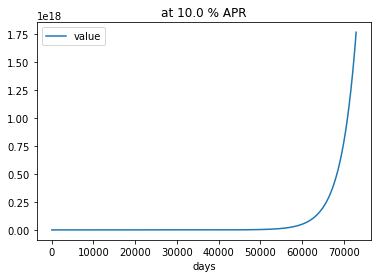

In [6]:
df.plot(title=f'at {interest_rate_annual*100} % APR')

In [7]:
data = {}
for rate in [0.02, 0.05, 0.1, 0.2]:
    print(rate)
    rate_daily = annual_interest_to_daily_simple(rate)
    data[str(rate)] = npf.fv(rate_daily, range(0, nper), pmt, pv)
df = pd.DataFrame.from_records(data)
df.index.name = 'days'
df

0.02
0.05
0.1
0.2


,0.02,0.05,0.1,0.2
days,,,,
0,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2,2.000055e+06,2.000137e+06,2.000274e+06,2.000548e+06
3,3.000164e+06,3.000411e+06,3.000822e+06,3.001644e+06
4,4.000329e+06,4.000822e+06,4.001644e+06,4.003289e+06
...,...,...,...,...
72995,9.777841e+11,1.605658e+14,1.763592e+18,4.237356e+26
72996,9.778387e+11,1.605878e+14,1.764075e+18,4.239678e+26
72997,9.778933e+11,1.606098e+14,1.764558e+18,4.242001e+26


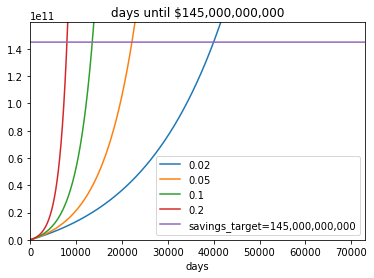

In [8]:
df[f'savings_target={savings_target:,}'] = savings_target
df.plot(xlim=(0, nper), ylim=(0, savings_target*1.1), title=f'days until ${savings_target:,}')

In [9]:
summary_str = f"If you saved ${pmt*-1:,} a day, you'd have ${savings_target:,} after"

years_until = {}
for column in df:
    col = df[column]
    output = col[col > savings_target].head(1)
    # print([column, output])
    if output.empty:
        days = None
        years = None
        value = None
        value_without_interest = None
    else:
        days = output.index[0]
        years = output.index[0] / 365
        value = output.values[0]
        value_without_interest = pmt * days * -1

    years_until[column] = {'days': days, 'years': years, 'value': value,
                           'value_without_interest': value_without_interest,
                           'diff': value - value_without_interest if value else None}
    if "." in column:
        summary_str += f" {years:.1f} years at {float(column)*100}% APR,"

#print(years_until)

pd.options.display.float_format = '{:,.2f}'.format
df_years_until = pd.DataFrame(years_until)
df_years_until.index.name = 'interest rate'
df_years_until.T

interest rate,days,years,value,value_without_interest,diff
0.02,"39,989.00",109.56,"145,000,059,420.29","39,989,000,000.00","105,011,059,420.29"
0.05,"22,179.00",60.76,"145,005,054,636.52","22,179,000,000.00","122,826,054,636.52"
0.1,"13,532.00",37.07,"145,003,286,468.73","13,532,000,000.00","131,471,286,468.73"
0.2,"8,010.00",21.95,"145,026,084,836.17","8,010,000,000.00","137,016,084,836.17"
"savings_target=145,000,000,000",None,None,None,None,None


In [10]:
print(f"{summary_str.rstrip(',')}.")

If you saved $1,000,000 a day, you'd have $145,000,000,000 after 109.6 years at 2.0% APR, 60.8 years at 5.0% APR, 37.1 years at 10.0% APR, 21.9 years at 20.0% APR.


https://numpy.org/doc/1.17/reference/generated/numpy.fv.html#numpy.fv

In [11]:
npf.fv?
# help(npf.fv)

Signature: npf.fv(rate, nper, pmt, pv, when='end')
Docstring:
Compute the future value.

Given:
 * a present value, `pv`
 * an interest `rate` compounded once per period, of which
   there are
 * `nper` total
 * a (fixed) payment, `pmt`, paid either
 * at the beginning (`when` = {'begin', 1}) or the end
   (`when` = {'end', 0}) of each period

Return:
   the value at the end of the `nper` periods

Parameters
----------
rate : scalar or array_like of shape(M, )
    Rate of interest as decimal (not per cent) per period
nper : scalar or array_like of shape(M, )
    Number of compounding periods
pmt : scalar or array_like of shape(M, )
    Payment
pv : scalar or array_like of shape(M, )
    Present value
when : {{'begin', 1}, {'end', 0}}, {string, int}, optional
    When payments are due ('begin' (1) or 'end' (0)).
    Defaults to {'end', 0}.

Returns
-------
out : ndarray
    Future values.  If all input is scalar, returns a scalar float.  If
    any input is array_like, returns future va

## A symbolic solution (with SymPy)

In [12]:
import sympy as sy
fv, pv, pmt, rate, when, nper = sy.var('fv pv pmt rate when nper')
fveq = sy.Eq(fv + pv*(1+rate)**nper + pmt*(1 + rate*when)/rate*((1 + rate)**nper - 1), 0)
fveq

Eq(fv + pmt*(rate*when + 1)*((rate + 1)**nper - 1)/rate + pv*(rate + 1)**nper, 0)

In [13]:
# Solve in terms of nper, rate
fveq__nper_rate = sy.solve(fveq, [nper, rate])
print(fveq)
print(fveq__nper_rate)
if tuple(int(x) for x in sy.__version__.split('.')) < (1,5,1):  # ? colab has 1.1.1
    fveq__nper_rate = fveq__nper_rate[0][nper]
else:
    fveq__nper_rate = fveq__nper_rate[0][0]
print(fveq__nper_rate)

Eq(fv + pmt*(rate*when + 1)*((rate + 1)**nper - 1)/rate + pv*(rate + 1)**nper, 0)
[(log((-fv*rate + pmt*rate*when + pmt)/(pmt*rate*when + pmt + pv*rate))/log(rate + 1), rate)]
log((-fv*rate + pmt*rate*when + pmt)/(pmt*rate*when + pmt + pv*rate))/log(rate + 1)


In [14]:
BEGIN, END = 1, 0
vals = {fv: savings_target, pv: 0, pmt: pmt_, when: END}
print(vals)

data = {}
for annual_interest_rate in [0.02, 0.05, 0.1, 0.2]:
    data[annual_interest_rate] = (fveq__nper_rate
        .subs(vals)
        .subs({rate: annual_interest_to_daily_simple(annual_interest_rate)}) / 365)
print(data)

{fv: 145000000000, pv: 0, pmt: -1000000, when: 0}
{0.02: 109.558885909925, 0.05: 60.7637197535231, 0.1: 37.0737514871950, 0.2: 21.9443170182029}
